## BTRAN and Fractional Loss of Conductivity

The $\text{btran}$ factor, is ultimately what mediates the effects of water stress on the stomatal conductance model.  The $\text{btran}$ factor scales down the maximum carboxylation rate of Rubisco, thereby reducing the amount of photosynthesis.  Note that using the Ball-Berry type of conductance model, $\text{btran}$ will also effect the cuticular conductance, but it will not effect the stomatal slope. The stomatal slope regulates the relative rate of water loss per unit of CO2 lost.

In FATES-Hydro, the $\text{btran}$ factor is synonomous with the fractional loss of conductivity $f_k$.  

$$ \text{btran} = f_{lc} $$

The $f_{lc}$ is actually used across all of the nodes from rhizosphere shells, absorbing roots, transporting roots, stem and leaves. In other contexts, it is used to calculate water fluxes between these compartments.  This is an important relationship.  For the the plant tissues, the following relationships describe fractional loss of conductivity:


$$ f_{lc} = \left(1 + \left(\frac{\Psi}{\Psi_{l50}}\right)^{\alpha_v}\right)^{-1} $$

The actual fluxes of water from compartment to compartment is governed by both the conductivity, and also the derivative of the conductivity with respect to potential.  The actual conductivity scales the maximum conductivity $k_{max}$ by this fractional loss.

$$ k = k_{max} \cdot f_{lc} $$


The derivative of conductivity with respect to potential, is mediated through the derivative of fractional loss.

$$ \frac{d k}{d \Psi} = k_{max} \cdot \frac{d f_{lc}}{d \Psi} $$


Here, the $btran$ is determined by the prognostic state of leaf water potential $\Psi_l$, and two PFT specific parameter constants, the leaf water potential at 50% conductance $\Psi_{l50}$, and the vulnerability factor $\alpha_v$ (a shape parameter).


| Symbol         | Description                                      | Units |
| :---           | :---:                                            | :---  |
| $\text{btran}$ | Water stress scale factor on vcmax               | 0-1   |  
| $\Psi_l$       | Leaf water potential                             | MPa   |
| $\Psi_{l50}$   | Leaf water potential at 50% stomatal conductance | MPa   |
| $\alpha_v$     | Vulnerability Factor                             | -     |



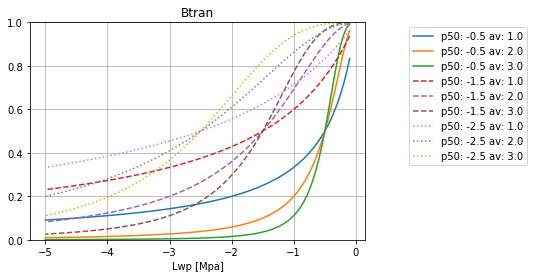

In [26]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import conda

lwp   = np.linspace(-0.1,-5,100)
btran = np.array(np.shape(lwp)) 

lwp_50 = [-0.5, -1.5, -2.5]
lwp50_sym = ['-','--',':']

a_v = [1.0,2.0,3.0]
av_co = []

fig1 = plt.figure()
plt.title('Btran')
plt.xlabel('Lwp [Mpa]')

for i50,p50 in enumerate(lwp_50):
    symb = lwp50_sym[i50]
    for iav,pav in enumerate(a_v):
        lab   = 'p50: {} av: {}'.format(p50,pav)
        btran = (1.0 + (lwp/p50)**pav )**(-1.0)
        
        plt.plot(lwp,btran,linestyle=symb,label=lab)

plt.ylim(0,1)
plt.legend(loc='upper right',bbox_to_anchor=(1.5, 1.0))
plt.grid()

## Boundary Conductances

